In [44]:
import pandas as pd
import matplotlib.pyplot as plt
# Imports for plotting
from matplotlib import pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report, average_precision_score, accuracy_score,precision_score,recall_score, f1_score,balanced_accuracy_score,roc_curve,roc_auc_score,confusion_matrix

In [45]:
baseline=pd.read_csv('../Model_Results/01_best_predictions_and_best_prob_baseline_model.csv')
gaussian_noise=pd.read_csv("../Model_Results/02_best_predictions_and_best_prob_gaussian_noise_model.csv")
gaussian_blur=pd.read_csv("../Model_Results/best_predictions_and_best_prob_gaussian_blur_model.csv")
rotate = pd.read_csv("../Model_Results/best_predictions_and_best_prob_rotate_model.csv")
color_jitter=pd.read_csv("../Model_Results/best_predictions_and_best_prob_cj_c20_model.csv")

baseline


Accuracy Score:  0.705
Precision Score:  0.7662337662337663
Recall Score:  0.59
F1 Score:  0.6666666666666666
Balanced Accuracy Score:  0.705
Confusion Matrix:
[[164  36]
 [ 82 118]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.67      0.82      0.74       200
           1       0.77      0.59      0.67       200

    accuracy                           0.70       400
   macro avg       0.72      0.70      0.70       400
weighted avg       0.72      0.70      0.70       400





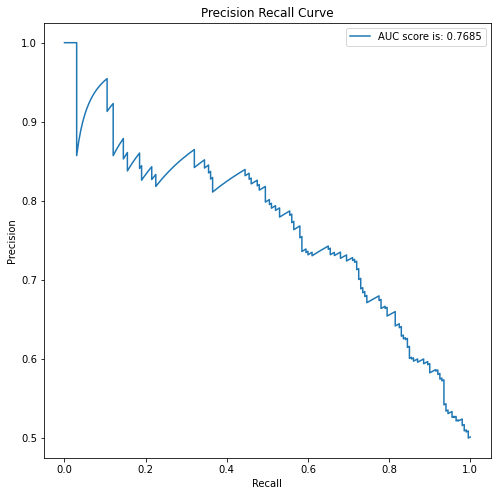

AUC:  0.7686749999999999


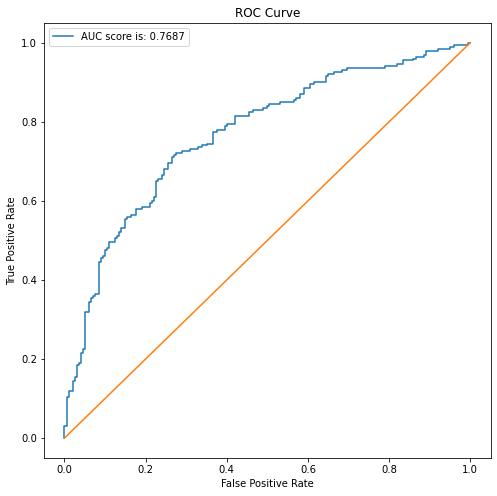

----------------------------------------------------
gaussian_noise


Accuracy Score:  0.82
Precision Score:  0.82
Recall Score:  0.82
F1 Score:  0.82
Balanced Accuracy Score:  0.82
Confusion Matrix:
[[164  36]
 [ 36 164]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       200
           1       0.82      0.82      0.82       200

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400





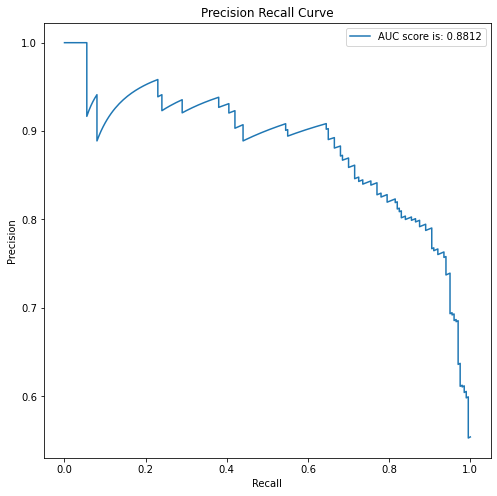

AUC:  0.897625


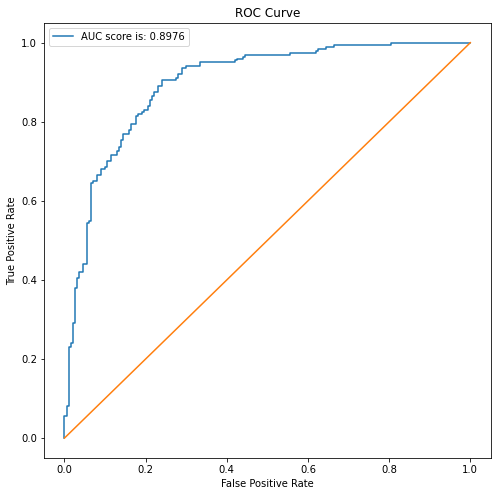

----------------------------------------------------
gaussian_blur


Accuracy Score:  0.86
Precision Score:  0.86
Recall Score:  0.86
F1 Score:  0.8599999999999999
Balanced Accuracy Score:  0.86
Confusion Matrix:
[[172  28]
 [ 28 172]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       200
           1       0.86      0.86      0.86       200

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400





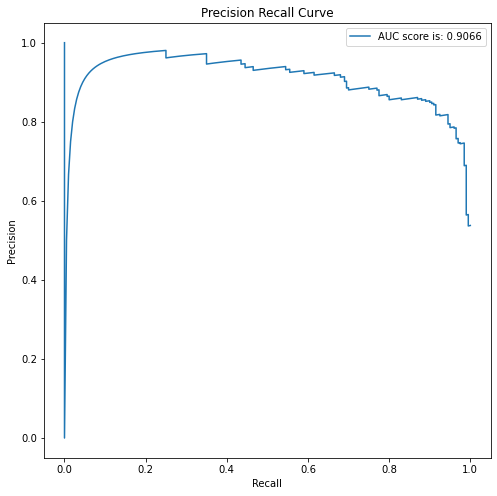

AUC:  0.9288250000000001


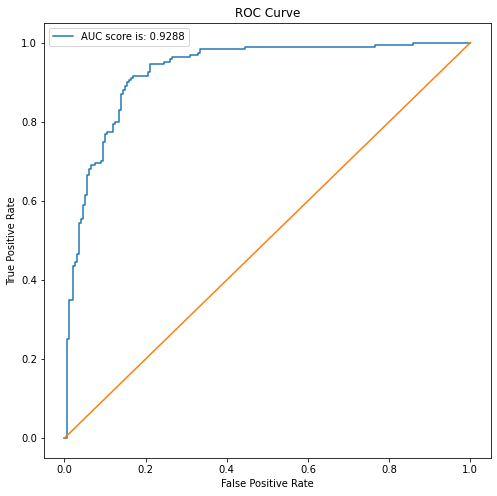

----------------------------------------------------
rotate


Accuracy Score:  0.83
Precision Score:  0.7946428571428571
Recall Score:  0.89
F1 Score:  0.839622641509434
Balanced Accuracy Score:  0.8300000000000001
Confusion Matrix:
[[154  46]
 [ 22 178]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       200
           1       0.79      0.89      0.84       200

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400





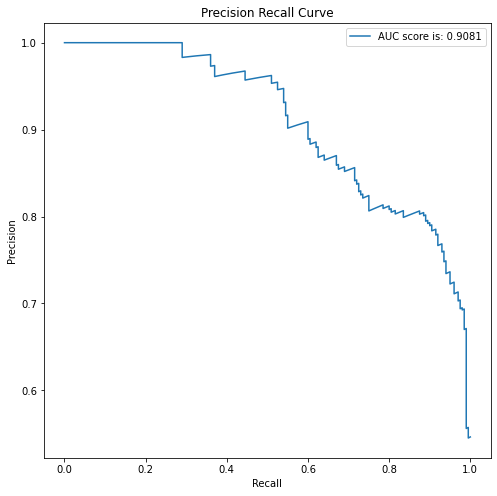

AUC:  0.9072


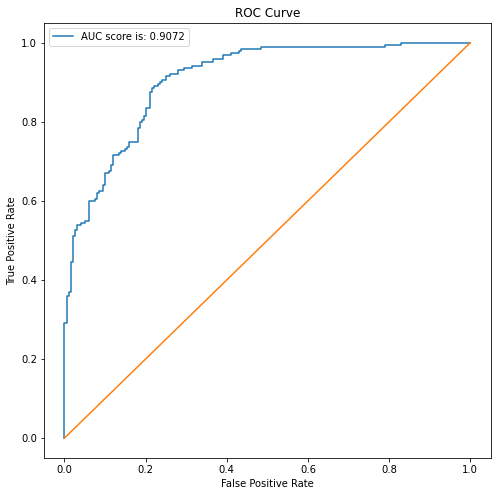

----------------------------------------------------
color_jitter


Accuracy Score:  0.845
Precision Score:  0.8709677419354839
Recall Score:  0.81
F1 Score:  0.8393782383419689
Balanced Accuracy Score:  0.845
Confusion Matrix:
[[176  24]
 [ 38 162]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       200
           1       0.87      0.81      0.84       200

    accuracy                           0.84       400
   macro avg       0.85      0.84      0.84       400
weighted avg       0.85      0.84      0.84       400





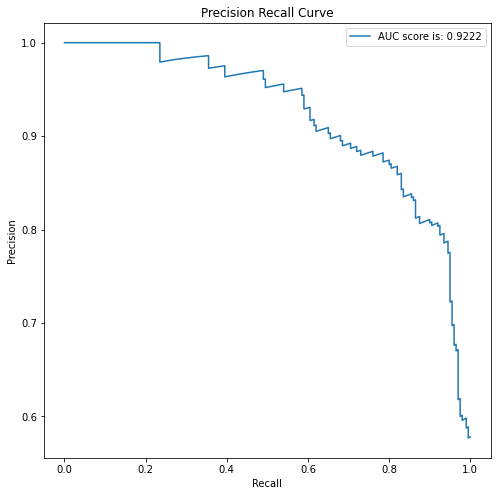

AUC:  0.920075


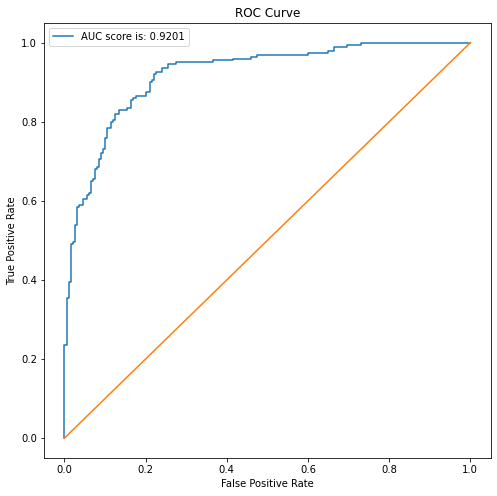

----------------------------------------------------


In [46]:
def print_model_results(data,aug,df):
    print(aug)
    print()
    print()
    print("Accuracy Score: ",accuracy_score(data['y_test'].values,data['best_predictions'].values))
    print("Precision Score: ",precision_score(data['y_test'].values,data['best_predictions'].values))
    print("Recall Score: ",recall_score(data['y_test'].values,data['best_predictions'].values))
    print("F1 Score: ", f1_score(data['y_test'].values,data['best_predictions'].values))
    print("Balanced Accuracy Score: ", balanced_accuracy_score(data['y_test'].values,data['best_predictions'].values))
    print("Confusion Matrix:")
    print(confusion_matrix(data['y_test'].values,data['best_predictions'].values))
    
                                               
    print("Classification Report: ")
    print(classification_report(data['y_test'].values,data['best_predictions'].values))
    print()
    
    
    
    print()
    precision, recall, thresholds = precision_recall_curve(data['y_test'].values, data['best_output_probs'].values)
    ap_score=average_precision_score(data['y_test'].values, data['best_output_probs'].values)
    
    plt.figure(figsize=(8,8))
    plt.plot(recall, precision, label='AUC score is: '+str(round(ap_score, 4)))
    plt.title('Precision Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()
    
    fpr, tpr, thresholds = roc_curve(data['y_test'].values, data['best_output_probs'].values)
  
    auc = roc_auc_score(data['y_test'].values, data['best_output_probs'].values)
    
    print("AUC: ",auc)
    plt.figure(figsize=(8,8))
    plt.plot(fpr, tpr, label='AUC score is: '+str(round(auc, 4)))
    plt.plot([0,1],[0,1])
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    
    df.loc[len(df)] = [aug.upper(),accuracy_score(data['y_test'].values,data['best_predictions'].values),
                       precision_score(data['y_test'].values,data['best_predictions'].values),
                       recall_score(data['y_test'].values,data['best_predictions'].values),
                       f1_score(data['y_test'].values,data['best_predictions'].values),
                       balanced_accuracy_score(data['y_test'].values,data['best_predictions'].values),
                      auc,ap_score]
                                               
    
    print("----------------------------------------------------")
    
    return df
df=pd.DataFrame(columns=["Model","Accuracy Score","Precision Score", "Recall Score","F1 Score","Balanced Accuracy Score", "Area Under the Curve", "Average Precision Score"])
for i,aug in zip([baseline,gaussian_noise,gaussian_blur,rotate,color_jitter],['baseline','gaussian_noise','gaussian_blur','rotate','color_jitter']):
    
    _=print_model_results(i,aug,df)
    

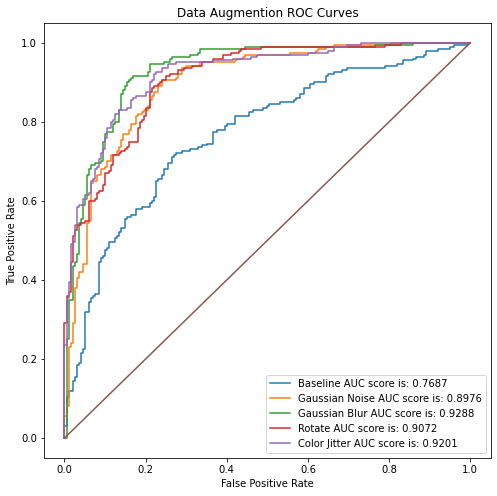

In [47]:


fpr_b, tpr_b, thresholds = roc_curve(baseline['y_test'].values, baseline['best_output_probs'].values)
auc_b = roc_auc_score(baseline['y_test'].values, baseline['best_output_probs'].values)

fpr_gn, tpr_gn, thresholds = roc_curve(gaussian_noise['y_test'].values, gaussian_noise['best_output_probs'].values)
auc_gn = roc_auc_score(gaussian_noise['y_test'].values, gaussian_noise['best_output_probs'].values)

fpr_gb, tpr_gb, thresholds = roc_curve(gaussian_blur['y_test'].values, gaussian_blur['best_output_probs'].values)
auc_gb = roc_auc_score(gaussian_blur['y_test'].values, gaussian_blur['best_output_probs'].values)

fpr_cj, tpr_cj, thresholds = roc_curve(color_jitter['y_test'].values, color_jitter['best_output_probs'].values)
auc_cj = roc_auc_score(color_jitter['y_test'].values, color_jitter['best_output_probs'].values)


fpr_r, tpr_r, thresholds = roc_curve(rotate['y_test'].values, rotate['best_output_probs'].values)
auc_r = roc_auc_score(rotate['y_test'].values, rotate['best_output_probs'].values)


plt.figure(figsize=(8,8))
plt.plot(fpr_b, tpr_b, label='Baseline AUC score is: '+str(round(auc_b, 4)))
plt.plot(fpr_gn, tpr_gn, label='Gaussian Noise AUC score is: '+str(round(auc_gn, 4)))

plt.plot(fpr_gb, tpr_gb, label='Gaussian Blur AUC score is: '+str(round(auc_gb, 4)))

plt.plot(fpr_r, tpr_r, label='Rotate AUC score is: '+str(round(auc_r, 4)))

plt.plot(fpr_cj, tpr_cj, label='Color Jitter AUC score is: '+str(round(auc_cj, 4)))


plt.plot([0,1],[0,1])
plt.title('Data Augmention ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

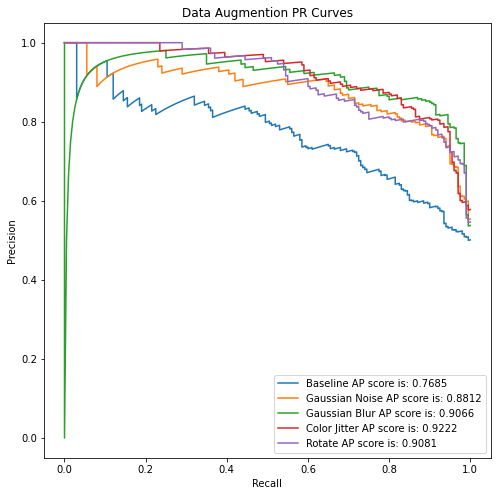

In [48]:
#baseline,gaussian_noise,gaussian_blur,rotate,color_jitter
p_b,r_b,t_b = precision_recall_curve(baseline['y_test'].values, baseline['best_output_probs'].values)
ap_score_b=average_precision_score(baseline['y_test'].values, baseline['best_output_probs'].values)
    
p_gn,r_gn,t_gn = precision_recall_curve(gaussian_noise['y_test'].values, gaussian_noise['best_output_probs'].values)
ap_score_gn=average_precision_score(gaussian_noise['y_test'].values, gaussian_noise['best_output_probs'].values)
    
p_gb,r_gb,t_gb = precision_recall_curve(gaussian_blur['y_test'].values, gaussian_blur['best_output_probs'].values)
ap_score_gb=average_precision_score(gaussian_blur['y_test'].values, gaussian_blur['best_output_probs'].values)
    
p_cj,r_cj,t_cj = precision_recall_curve(color_jitter['y_test'].values, color_jitter['best_output_probs'].values)
ap_score_cj=average_precision_score(color_jitter['y_test'].values, color_jitter['best_output_probs'].values)
    
p_r,r_r,t_r = precision_recall_curve(rotate['y_test'].values, rotate['best_output_probs'].values)
ap_score_r=average_precision_score(rotate['y_test'].values, rotate['best_output_probs'].values)
 
    

plt.figure(figsize=(8,8))
plt.plot(r_b, p_b, label='Baseline AP score is: '+str(round(ap_score_b, 4)))
plt.plot(r_gn, p_gn, label='Gaussian Noise AP score is: '+str(round(ap_score_gn, 4)))

plt.plot(r_gb, p_gb, label='Gaussian Blur AP score is: '+str(round(ap_score_gb, 4)))

plt.plot(r_cj, p_cj, label='Color Jitter AP score is: '+str(round(ap_score_cj, 4)))

plt.plot(r_r, p_r, label='Rotate AP score is: '+str(round(ap_score_r, 4)))



plt.title('Data Augmention PR Curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [49]:
df

,Model,Accuracy Score,Precision Score,Recall Score,F1 Score,Balanced Accuracy Score,Area Under the Curve,Average Precision Score
0,BASELINE,0.705,0.766234,0.59,0.666667,0.705,0.768675,0.768464
1,GAUSSIAN_NOISE,0.820,0.820000,0.82,0.820000,0.820,0.897625,0.881193
2,GAUSSIAN_BLUR,0.860,0.860000,0.86,0.860000,0.860,0.928825,0.906600
3,ROTATE,0.830,0.794643,0.89,0.839623,0.830,0.907200,0.908080
4,COLOR_JITTER,0.845,0.870968,0.81,0.839378,0.845,0.920075,0.922229


In [50]:
#Color Jitter

In [51]:
cj1=pd.read_csv("../Model_Results/best_predictions_and_best_prob_cj_c1_model.csv")
cj5=pd.read_csv("../Model_Results/best_predictions_and_best_prob_cj_c5_model.csv")
cj10=pd.read_csv("../Model_Results/best_predictions_and_best_prob_cj_c10_model.csv")
cj15=pd.read_csv("../Model_Results/best_predictions_and_best_prob_cj_c15_model.csv")
cj20=pd.read_csv("../Model_Results/best_predictions_and_best_prob_cj_c20_model.csv")



CJ-1


Accuracy Score:  0.835
Precision Score:  0.8681318681318682
Recall Score:  0.79
F1 Score:  0.8272251308900523
Balanced Accuracy Score:  0.835
Confusion Matrix:
[[176  24]
 [ 42 158]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       200
           1       0.87      0.79      0.83       200

    accuracy                           0.83       400
   macro avg       0.84      0.83      0.83       400
weighted avg       0.84      0.83      0.83       400





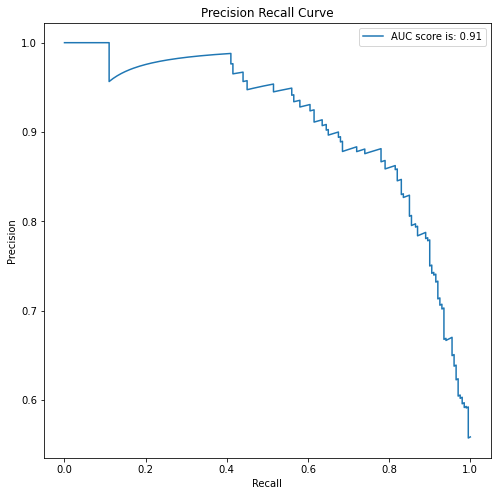

AUC:  0.9061


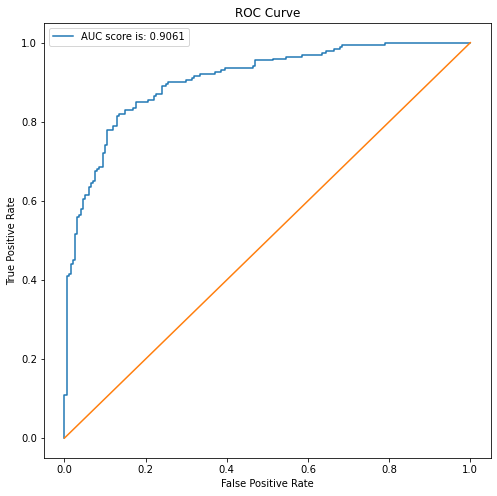

ValueError: cannot set a row with mismatched columns

In [52]:
df1=pd.DataFrame(columns=["Model","Accuracy Score","Precision Score", "F1 Score","Balanced Accuracy Score","AUC Score","AP Score"])
for i,aug in zip([cj1,cj5,cj10,cj15,cj20],['CJ-1','CJ-5','CJ-10','CJ-15','CJ-20']):
    
    _=print_model_results(i,aug,df1)
df1